In [1]:
import pandas as pd
warsaw = pd.read_csv("data/WARSZAWA-BIELANY.csv", low_memory=False)

### Divide data in two time periods: after 2004 and betwee 1989 and 2003

In [2]:
after2004 = warsaw[(warsaw.year >= 2004)]
between19892003 = warsaw[(warsaw.year < 2004) & (warsaw.year >= 1989)]

In [3]:
between19892003.tail()

,station_number,station_name,year,month,day,T_MAX,T_MAX_status,T_MIN,T_MIN_status,T_AV,T_AV_status,T_MING,T_MING_status,PREC,PREC_status,PREC_type,SNOW,SNOW_status
6569,252200150,WARSZAWA-BIELANY,2003.0,12.0,27.0,3.2,NaN,-1.2,NaN,0.7,NaN,-2.4,NaN,0.0,9.0,NaN,0.0,9.0
6570,252200150,WARSZAWA-BIELANY,2003.0,12.0,28.0,3.5,NaN,-0.8,NaN,1.2,NaN,-6.0,NaN,0.0,9.0,NaN,0.0,9.0
6571,252200150,WARSZAWA-BIELANY,2003.0,12.0,29.0,6.5,NaN,2.3,NaN,4.3,NaN,0.1,NaN,1.0,NaN,W,0.0,9.0
6572,252200150,WARSZAWA-BIELANY,2003.0,12.0,30.0,4.6,NaN,1.2,NaN,2.4,NaN,-0.2,NaN,6.9,NaN,S,0.0,9.0
6573,252200150,WARSZAWA-BIELANY,2003.0,12.0,31.0,1.4,NaN,0.2,NaN,0.7,NaN,-0.2,NaN,3.9,NaN,S,0.0,NaN


### Number of days with temperatures above cutoff temperature in two time periods

In [4]:
hot_days = {}
for i in range(30):
    cutoff = 25.0+i*0.5
    hot_days[cutoff] = [between19892003[between19892003.T_MAX > cutoff].count()['T_MAX'], after2004[after2004.T_MAX > cutoff].count()['T_MAX']]
    
for k, v in hot_days.items():
    print(k, v)

25.0 [698, 853]
25.5 [623, 781]
26.0 [544, 695]
26.5 [460, 636]
27.0 [386, 532]
27.5 [335, 467]
28.0 [283, 402]
28.5 [235, 338]
29.0 [189, 287]
29.5 [155, 234]
30.0 [126, 194]
30.5 [98, 156]
31.0 [83, 129]
31.5 [67, 97]
32.0 [45, 79]
32.5 [38, 68]
33.0 [30, 47]
33.5 [24, 40]
34.0 [14, 26]
34.5 [9, 21]
35.0 [8, 14]
35.5 [7, 11]
36.0 [6, 10]
36.5 [2, 8]
37.0 [0, 2]
37.5 [0, 2]
38.0 [0, 0]
38.5 [0, 0]
39.0 [0, 0]
39.5 [0, 0]


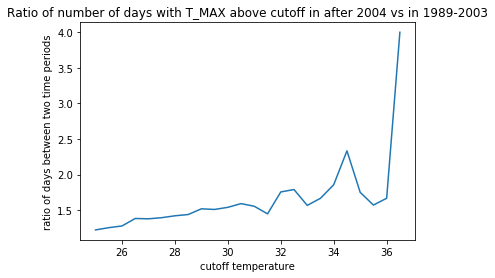

In [21]:
import matplotlib.pyplot as plt

lists = sorted(hot_days.items()) # sorted by key, return a list of tuples

x, pairs = zip(*lists) # unpack a list of pairs into two tuples

y = [e[1]/e[0] if e[0]>0 else None for e in pairs]

plt.plot(x,y)
plt.title('Ratio of number of days with T_MAX above cutoff in after 2004 vs in 1989-2003')
plt.xlabel('cutoff temperature')
plt.ylabel('ratio of days between two time periods')
plt.show()

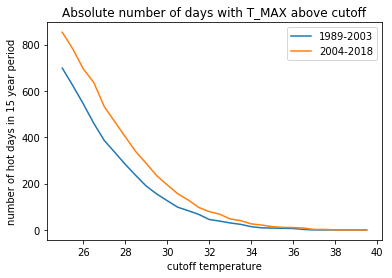

In [20]:
plt.plot(x,pairs)
plt.title('Absolute number of days with T_MAX above cutoff')
plt.gca().legend(('1989-2003','2004-2018'))
plt.xlabel('cutoff temperature')
plt.ylabel('number of hot days in 15 year period')
plt.show()

### Collect number of days with maximal and minimal temperatures above selected cutoffs 

In [9]:
hot_days2 = {}
for i in range(25):
    cutoff_max = 25.0+i*0.5
    for j in range(25):
        cutoff_min = 15.0+j*0.5
        hot_days2[(cutoff_max, cutoff_min)] = [between19892003[(between19892003.T_MAX > cutoff_max) & (between19892003.T_MIN > cutoff_min)].count()['T_MAX'],
                                               after2004[(after2004.T_MAX > cutoff_max) & (after2004.T_MIN > cutoff_min)].count()['T_MAX']]

### Table of ratios of the number of days with T_MAX > T1 and T_MIN > T2 between in time period after 2004 to the number of such days in between 1989-2003

In [12]:
ratios2 = {}

for k, v in hot_days2.items():
    if v[0] > 0:
        ratios2[k] = v[1]/v[0]

ser = pd.Series(list(ratios2.values()),
              index=pd.MultiIndex.from_tuples(ratios2.keys()))
df = ser.unstack().fillna(0)
df.shape
df

,15.0,15.5,16.0,16.5,17.0,17.5,18.0,18.5,19.0,19.5,20.0,20.5,21.0,21.5,22.0,22.5,23.0
25.0,1.340176,1.316498,1.386454,1.378505,1.350000,1.291391,1.509259,1.488372,1.380952,1.200000,1.275862,1.263158,1.600000,1.60,2.0,2.5,3.0
25.5,1.410256,1.369565,1.440171,1.435000,1.372093,1.303448,1.504762,1.500000,1.409836,1.232558,1.321429,1.263158,1.600000,1.60,2.0,2.5,3.0
26.0,1.456446,1.392308,1.459459,1.453125,1.391566,1.321429,1.495146,1.493976,1.400000,1.238095,1.333333,1.263158,1.600000,1.60,2.0,2.5,3.0
26.5,1.517241,1.453390,1.524510,1.508475,1.467105,1.417323,1.595745,1.584416,1.482143,1.300000,1.384615,1.263158,1.600000,1.60,2.0,2.5,3.0
27.0,1.458678,1.406393,1.476684,1.470238,1.434483,1.404959,1.571429,1.552632,1.446429,1.300000,1.384615,1.263158,1.600000,1.60,2.0,2.5,3.0
27.5,1.477273,1.427861,1.477778,1.474359,1.422222,1.424779,1.579545,1.554054,1.428571,1.275000,1.346154,1.263158,1.600000,1.60,2.0,2.5,3.0
28.0,1.450980,1.409574,1.485030,1.486301,1.472000,1.439252,1.614458,1.577465,1.444444,1.282051,1.307692,1.263158,1.600000,1.60,2.0,2.5,3.0
28.5,1.455556,1.427711,1.493333,1.514925,1.508772,1.460000,1.675325,1.597015,1.490196,1.351351,1.360000,1.333333,1.600000,1.60,2.0,2.5,3.0
29.0,1.529412,1.465753,1.533835,1.571429,1.603960,1.573034,1.823529,1.672131,1.608696,1.531250,1.571429,1.600000,1.777778,1.60,2.0,2.5,3.0
29.5,1.492537,1.419847,1.491525,1.551402,1.565217,1.500000,1.758065,1.654545,1.595238,1.586207,1.777778,1.846154,2.000000,1.60,2.0,2.5,3.0


### Representing the table as a heatmap

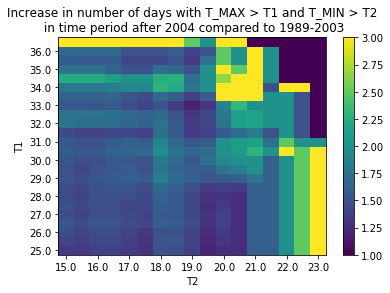

In [19]:
import numpy as np
fig, axs = plt.subplots()

plt.pcolor(df, vmin = 1.0, vmax = 3.0)
plt.colorbar()

plt.yticks(np.arange(0.5, len(df.index), 2), df.index[::2])
plt.xticks(np.arange(0.5, len(df.columns), 2), df.columns[::2])
plt.title('Increase in number of days with T_MAX > T1 and T_MIN > T2\n in time period after 2004 compared to 1989-2003')
plt.xlabel('T2')
plt.ylabel('T1')
plt.show()

### Absolute numbers of hot days with T_MAX and T_MIN above respective cutoffs after 2004

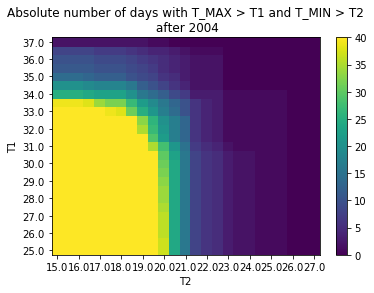

In [24]:
breadth = {}

for k, v in hot_days2.items():
    breadth[k] = v[1]

ser2 = pd.Series(list(breadth.values()),
              index=pd.MultiIndex.from_tuples(breadth.keys()))
df2 = ser2.unstack().fillna(0)

plt.pcolor(df2, vmax=40)
plt.colorbar()

plt.yticks(np.arange(0.5, len(df2.index), 2), df2.index[::2])
plt.xticks(np.arange(0.5, len(df2.columns), 2), df2.columns[::2])
plt.title('Absolute number of days with T_MAX > T1 and T_MIN > T2\n after 2004')
plt.xlabel('T2')
plt.ylabel('T1')
plt.show()

### Table of ratios of the number of days preceded by N days with T_MAX > T1 in time period after 2004 to the number of such days in between 1989-2003

In [26]:
is_after04 = warsaw['year'] >= 2004
is_b8903 = (warsaw.year < 2004) & (warsaw.year >= 1989)

hot_days4 = {}
max_len = 14
for i in range(25):
    cutoff_max = 25.0+i*0.5
    
    
    
    for j in range(max_len):
        conditions_str = []
        for k in range(j+1):
            cond = '(warsaw[\'T_MAX\'].shift(-' + str(k) + ') > ' + str(cutoff_max)+')'
            conditions_str.append(cond)
        
        conditions = eval(" & ".join(conditions_str))
        hot_days4[(cutoff_max, j)] = [warsaw[(conditions) & (is_b8903)].count()['T_MAX'],
                                               warsaw[(conditions) & (is_after04)].count()['T_MAX']]

In [27]:
ratios4 = {}

for k, v in hot_days4.items():
    if v[0] > 0:
        ratios4[k] = v[1]/v[0]

ser = pd.Series(list(ratios4.values()),
              index=pd.MultiIndex.from_tuples(ratios4.keys()))
df_cons = ser.unstack().fillna(0)
df_cons.shape
df_cons

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
25.0,1.222063,1.266667,1.324176,1.355311,1.395122,1.385093,1.364341,1.359223,1.294118,1.231884,1.178571,1.133333,1.147059,1.125000
25.5,1.253612,1.310748,1.388158,1.428571,1.472727,1.519685,1.509804,1.518519,1.562500,1.568627,1.600000,1.724138,1.809524,1.733333
26.0,1.277574,1.320652,1.361868,1.336898,1.301471,1.291262,1.222222,1.209677,1.212766,1.277778,1.321429,1.450000,1.500000,1.363636
26.5,1.382609,1.479730,1.565657,1.619403,1.623656,1.707692,1.723404,1.937500,2.181818,2.235294,2.142857,2.181818,2.250000,2.166667
27.0,1.378238,1.462185,1.484076,1.519608,1.507246,1.530612,1.588235,1.909091,2.062500,2.166667,2.222222,2.666667,3.000000,2.666667
27.5,1.394030,1.477612,1.519685,1.671053,1.750000,1.848485,2.190476,2.642857,2.727273,2.666667,2.571429,2.800000,2.500000,2.000000
28.0,1.420495,1.502994,1.673684,1.910714,2.028571,2.304348,2.857143,3.100000,3.125000,2.714286,2.333333,2.000000,1.500000,1.333333
28.5,1.438298,1.496296,1.670886,2.195122,2.500000,3.000000,3.400000,3.000000,2.625000,2.142857,1.666667,1.400000,1.000000,1.000000
29.0,1.518519,1.762887,2.132075,2.387097,2.789474,3.416667,3.444444,3.125000,2.857143,2.500000,2.000000,1.750000,1.333333,1.500000
29.5,1.509677,1.646341,1.911111,2.250000,2.571429,3.714286,5.000000,5.333333,6.000000,9.000000,0.000000,0.000000,0.000000,0.000000


### Representing the table as a heatmap

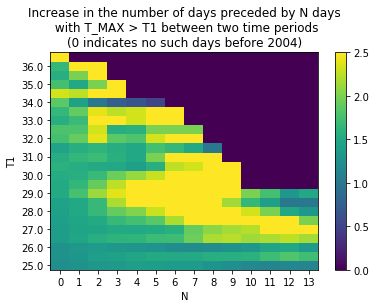

In [31]:
plt.pcolor(df_cons, vmax=2.5)
plt.colorbar()

plt.yticks(np.arange(0.5, len(df_cons.index), 2), df_cons.index[::2])
plt.xticks(np.arange(0.5, len(df_cons.columns), 1), df_cons.columns)
plt.title('Increase in the number of days preceded by N days\n with T_MAX > T1 between two time periods\n(0 indicates no such days before 2004)')
plt.xlabel('N')
plt.ylabel('T1')
plt.show()

### Absolute number of days preceded by N days with T_MAX > T1 after 2004

In [32]:
abs4 = {}

for k, v in hot_days4.items():
    abs4[k] = v[1]

ser2 = pd.Series(list(abs4.values()),
              index=pd.MultiIndex.from_tuples(abs4.keys()))
df_cons2 = ser2.unstack().fillna(0)

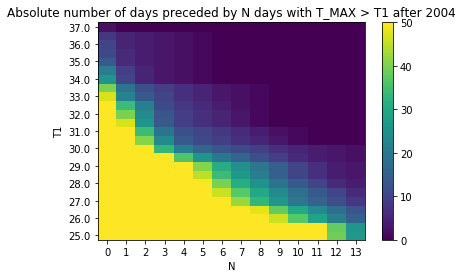

In [33]:
import numpy as np

plt.pcolor(df_cons2, vmax=50)
plt.colorbar()

plt.yticks(np.arange(0.5, len(df_cons2.index), 2), df_cons2.index[::2])
plt.xticks(np.arange(0.5, len(df_cons2.columns), 1), df_cons2.columns)
plt.title('Absolute number of days preceded by N days with T_MAX > T1 after 2004')
plt.xlabel('N')
plt.ylabel('T1')
plt.show()